# Librerías

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

# Def. Variables

In [2]:
x = sp.Symbol("x", real=True)
y = sp.Symbol("y", real=True)

def T(x,y,p):
    return p[0] + p[1]*x + p[2]*y + p[3]*x*y

# a) Función bilineal
- - -
- Creación de la matriz
- Función

In [3]:
a_00 = sp.Symbol("a_00", real=True)
a_01 = sp.Symbol("a_01", real=True)
a_10 = sp.Symbol("a_10", real=True)
a_11 = sp.Symbol("a_11", real=True)

A = np.array([[a_00,a_01],[a_10,a_11]])

In [4]:
T_ = 0
for i in range(2):
    for j in range(2):
        T_ += A[i][j]*(x**i)*(y**j)
T_

a_00 + a_01*y + a_10*x + a_11*x*y

# b) Vértices

In [5]:
Pos = np.zeros((4,2))
Pos[0][0]=1;Pos[0][1]=1;Pos[1][0]=-1;Pos[1][1]=1;Pos[2][0]=-1;Pos[2][1]=-1;Pos[3][0]=1;Pos[3][1]=-1
Pos

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

# c) Sistema de ecuaciones

In [6]:
coeff = np.array([[ 1, 1, 1, 1],\
                  [ 1,-1, 1,-1],\
                  [ 1,-1,-1, 1],\
                  [ 1, 1,-1,-1]])

In [7]:
Sol = np.array([1,2,0.5,0.3])
x = np.linalg.solve(coeff, Sol)
x

array([ 0.95, -0.3 ,  0.55, -0.2 ])

# d) Verificación

In [8]:
T_1 = T(Pos[0][0],Pos[0][1],x)
T_2 = T(Pos[1][0],Pos[1][1],x)
T_3 = T(Pos[2][0],Pos[2][1],x)
T_4 = T(Pos[3][0],Pos[3][1],x)

T_1,T_2,T_3,T_4

(1.0, 2.0, 0.49999999999999994, 0.2999999999999999)

# e) Gráficas

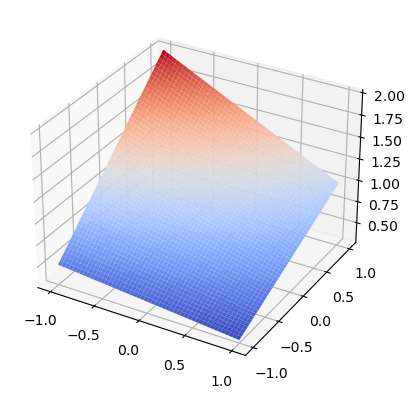

In [9]:
a = np.linspace(-1,1,1000)
b = np.linspace(-1,1,1000)
X, Y= np.meshgrid(a,b)
Z = T(X,Y,x)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

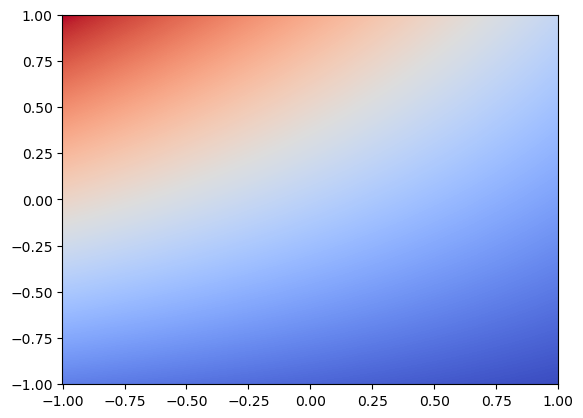

In [10]:
plt.pcolormesh(X,Y,Z,cmap='coolwarm')

# f) Ejercicio práctico

In [11]:
T(0,0.5,x)

1.225

# g) función rotación

In [12]:
def g(x,y,theta=np.pi/2):
    rotor = np.array([[np.cos(theta),-np.sin(theta)],\
                      [np.sin(theta),np.cos(theta)]])
    punto = np.array([x,y])
    return np.dot(rotor,punto)

P_1_ = g(Pos[0][0],Pos[0][1])
P_2_ = g(Pos[1][0],Pos[1][1])
P_3_ = g(Pos[2][0],Pos[2][1])
P_4_ = g(Pos[3][0],Pos[3][1])
P_problema = g(0,0.5)

(P_1_,P_2_,P_3_,P_4_)

(array([-1.,  1.]), array([-1., -1.]), array([ 1., -1.]), array([1., 1.]))

### Función Interpolación

In [13]:
def interpolacion(tupla):
    p1,p2,p3,p4 = tupla
    coeff = np.array([[1,p1[0],p1[1],p1[0]*p1[1]],\
                      [1,p2[0],p2[1],p2[0]*p2[1]],\
                      [1,p3[0],p3[1],p3[0]*p3[1]],\
                      [1,p4[0],p4[1],p4[0]*p4[1]]])
    Sol = np.array([1,2,0.5,0.3])
    x = np.linalg.solve(coeff, Sol)
    return x
interpolacion((P_1_,P_2_,P_3_,P_4_))

array([ 0.95, -0.55, -0.3 ,  0.2 ])

# h) Cálculo de las temperaturas luego de aplicar una rotación

In [14]:
T_1_ = T(P_1_[0],P_1_[1],x)
T_2_ = T(P_2_[0],P_2_[1],x)
T_3_ = T(P_3_[0],P_3_[1],x)
T_4_ = T(P_4_[0],P_4_[1],x)
T_problema = T(P_problema[0],P_problema[1],x)

T_1_,T_2_,T_3_,T_4_,T_problema

(2.0,
 0.5000000000000001,
 0.29999999999999993,
 0.9999999999999998,
 1.0999999999999999)

# i) Cálculo del ángulo de mínima temperatura

In [15]:
angulo = np.linspace(0,2*np.pi,200)
t = []
menor = 2000
angulo_optimo = 0
for i in angulo:
    tupla = (g(Pos[0][0],Pos[0][1],i),g(Pos[1][0],Pos[1][1],i),g(Pos[2][0],Pos[2][1],i),g(Pos[3][0],Pos[3][1],i))
    x = interpolacion(tupla)
    T_problema = T(0,0.5,x)
    t.append(T_problema)
    if menor > T_problema:
        menor = T_problema
        angulo_optimo = i
print("El angulo optimo es ", angulo_optimo, " dado que tuvo una temperatura de ", menor)

El angulo optimo es  2.652198823131082  dado que tuvo una temperatura de  0.6367664129532491


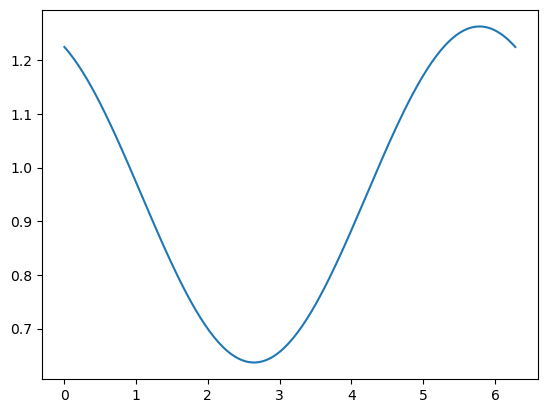

In [16]:
plt.plot(angulo,t)